In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline
if os.getenv('PUI2016') is None:
    print("must")
if os.getenv('PUIDATA') is None:
    print("must")


#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/pf910/PUIdata'

In [3]:
os.getenv('PUI2016')

'/home/cusp/pf910/PUI2016'

In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [6]:
ls

getCitiBikeCSV.py      hw4-assignment4.ipynb  W4-assignment3-pf910.ipynb
getCitiBikeCSV.pyc     __pycache__/           W4-Assignment4-pf910.ipynb
HW4_ASGN3-pf910.ipynb  Untitled.ipynb


In [7]:
! curl -O 'https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW4_fb55/getCitiBikeCSV.py'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
103  2282  103  2282    0     0  10179      0 --:--:-- --:--:-- --:--:-- 55658


In [8]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [9]:
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head(200)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2,2015-01-01 00:07:00
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1,2015-01-01 00:07:00
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2,2015-01-01 00:08:00
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1,2015-01-01 00:09:00
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1,2015-01-01 00:10:00


In [10]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [11]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [12]:
df.head(200)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,38.0,NaN
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2,2015-01-01 00:07:00,NaN,46.0
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1,2015-01-01 00:07:00,43.0,NaN
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2,2015-01-01 00:08:00,NaN,30.0
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1,2015-01-01 00:09:00,24.0,NaN
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1,2015-01-01 00:10:00,24.0,NaN


In [13]:
df['time'] = df['date'].dt.hour

df['time'].head()
#df['day'] = df['date'] [(df['usertype'] == 'Subscriber') & (df['date'] == 2)]

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int64

In [14]:
df['day']=df['time'][(df['usertype'] == 'Subscriber') & (df['time'] >= 12)]
df['night']=df['time'][(df['usertype'] == 'Subscriber') & (df['time'] <= 12)]

In [15]:
df['ageD'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['time'] >= 12) & (df['day'] != NaN)]
df['ageN'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['time'] <= 12) & (df['night'] != NaN)]

In [16]:
df[:1000]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,date,ageM,ageF,time,day,night,ageD,ageN
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,...,1960.0,2,2015-01-01 00:01:00,NaN,55.0,0,NaN,0.0,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,...,1963.0,1,2015-01-01 00:02:00,52.0,NaN,0,NaN,0.0,NaN,52.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,...,1974.0,1,2015-01-01 00:04:00,41.0,NaN,0,NaN,0.0,NaN,41.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,...,1969.0,1,2015-01-01 00:04:00,46.0,NaN,0,NaN,0.0,NaN,46.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,...,1977.0,1,2015-01-01 00:05:00,38.0,NaN,0,NaN,0.0,NaN,38.0
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,...,1969.0,2,2015-01-01 00:07:00,NaN,46.0,0,NaN,0.0,NaN,46.0
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,...,1972.0,1,2015-01-01 00:07:00,43.0,NaN,0,NaN,0.0,NaN,43.0
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,...,1985.0,2,2015-01-01 00:08:00,NaN,30.0,0,NaN,0.0,NaN,30.0
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,...,1991.0,1,2015-01-01 00:09:00,24.0,NaN,0,NaN,0.0,NaN,24.0
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,...,1991.0,1,2015-01-01 00:10:00,24.0,NaN,0,NaN,0.0,NaN,24.0


In [17]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF,time,day,night,ageD,ageN
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000,285552.000000,180335.000000,113609.000000,180335.000000,113609.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145,13.627697,16.720431,8.512539,39.816026,40.524061
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112,4.906211,2.791170,2.514507,11.628300,11.529496
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000,0.000000,12.000000,0.000000,16.000000,16.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000,23.000000,23.000000,12.000000,116.000000,116.000000


In [18]:
#df['ageN'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['night'] != NaN)]

In [19]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)
df['ageD'].dropna(inplace= True)
df['ageN'].dropna(inplace= True)

In [20]:
df.head(200)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,date,ageM,ageF,time,day,night,ageD,ageN
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,...,1960.0,2,2015-01-01 00:01:00,NaN,55.0,0,NaN,0.0,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,...,1963.0,1,2015-01-01 00:02:00,52.0,NaN,0,NaN,0.0,NaN,52.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,...,1974.0,1,2015-01-01 00:04:00,41.0,NaN,0,NaN,0.0,NaN,41.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,...,1969.0,1,2015-01-01 00:04:00,46.0,NaN,0,NaN,0.0,NaN,46.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,...,1977.0,1,2015-01-01 00:05:00,38.0,NaN,0,NaN,0.0,NaN,38.0
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,...,1969.0,2,2015-01-01 00:07:00,NaN,46.0,0,NaN,0.0,NaN,46.0
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,...,1972.0,1,2015-01-01 00:07:00,43.0,NaN,0,NaN,0.0,NaN,43.0
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,...,1985.0,2,2015-01-01 00:08:00,NaN,30.0,0,NaN,0.0,NaN,30.0
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,...,1991.0,1,2015-01-01 00:09:00,24.0,NaN,0,NaN,0.0,NaN,24.0
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,...,1991.0,1,2015-01-01 00:10:00,24.0,NaN,0,NaN,0.0,NaN,24.0


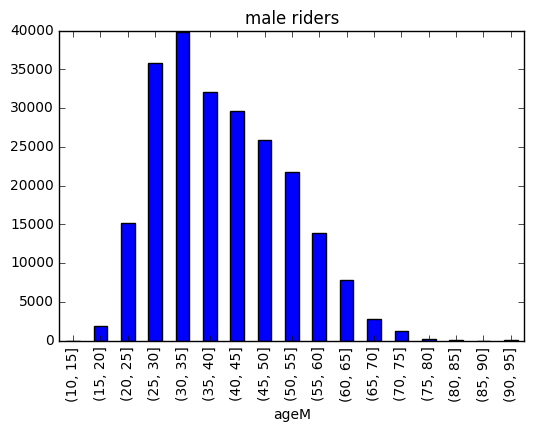

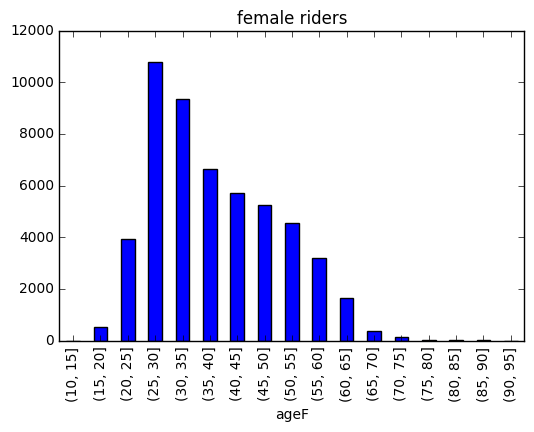

In [21]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

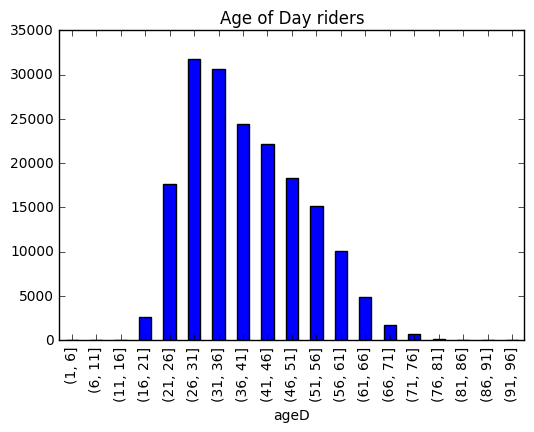

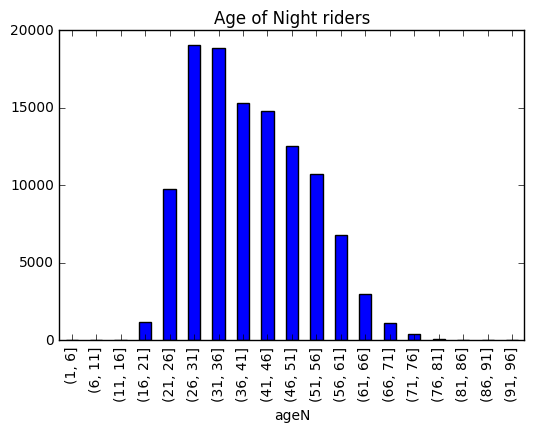

In [22]:
#extra credit
bins = np.arange(1, 99, 5)
axD = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Age of Day riders")
axN = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Age of Night riders")


          count_nonzero
ageN                   
(1, 6]         0.000000
(6, 11]        0.000000
(11, 16]       0.000011
(16, 21]       0.004460
(21, 26]       0.016091
(26, 31]       0.024127
(31, 36]       0.028106
(36, 41]       0.029054
(41, 46]       0.021885
(46, 51]       0.013047
(51, 56]       0.002932
(56, 61]       0.001003
(61, 66]       0.000374
(66, 71]       0.000502
(71, 76]       0.000001
(76, 81]       0.000063
(81, 86]       0.000079
(86, 91]       0.000057
(91, 96]       0.000000


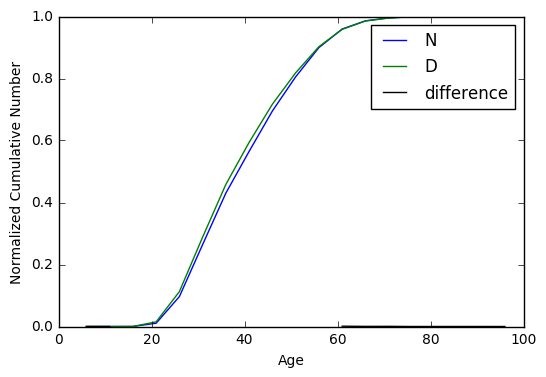

In [23]:
#extra credit
csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csN / csN.max()-csD / csD.max()))

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()



          count_nonzero
ageM                   
(1, 6]         0.000000
(6, 11]        0.000000
(11, 16]       0.000202
(16, 21]       0.001850
(21, 26]       0.015720
(26, 31]       0.059622
(31, 36]       0.062053
(36, 41]       0.047044
(41, 46]       0.027124
(46, 51]       0.010637
(51, 56]       0.009803
(56, 61]       0.014215
(61, 66]       0.006324
(66, 71]       0.002695
(71, 76]       0.000595
(76, 81]       0.000047
(81, 86]       0.000002
(86, 91]       0.000075
(91, 96]       0.000000


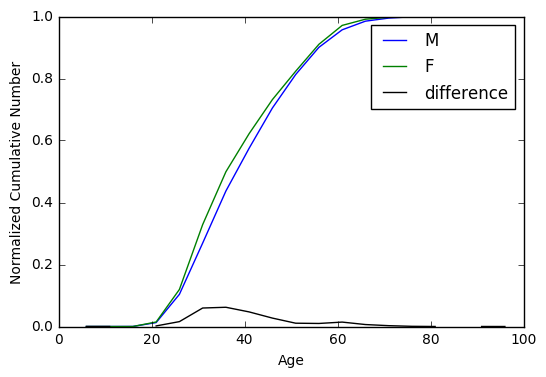

In [24]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [25]:
import scipy.stats

In [26]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


In [27]:
#extracredit
ks = scipy.stats.ks_2samp(df.ageN, df.ageD)
print (ks)

Ks_2sampResult(statistic=0.031272514057306834, pvalue=1.0982192570225311e-59)


##Analysis

 we can reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than our significance level but if the K-S statistic is small or the p-value is high(greater than 0.05), then we cannot reject the hypothesis that the distributions of the two samples are the same. Since our pvalue for day and night and female and male are very small(less than 0.05, our significant level) we reject the null hypo that  samples came from the same distribution and claim the two distributions are different.



## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

In [28]:
subdf = df.loc[::200,:]

In [29]:
subdf.head(200)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,date,ageM,ageF,time,day,night,ageD,ageN
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,...,1960.0,2,2015-01-01 00:01:00,NaN,55.0,0,NaN,0.0,NaN,55.0
200,571,1/1/2015 1:36,1/1/2015 1:46,297,E 15 St & 3 Ave,40.734232,-73.986923,394,E 9 St & Avenue C,40.725213,...,1965.0,1,2015-01-01 01:36:00,50.0,NaN,1,NaN,1.0,NaN,50.0
400,364,1/1/2015 2:52,1/1/2015 2:58,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,347,W Houston St & Hudson St,40.728739,...,1989.0,1,2015-01-01 02:52:00,26.0,NaN,2,NaN,2.0,NaN,26.0
600,284,1/1/2015 7:02,1/1/2015 7:07,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,503,E 20 St & Park Ave,40.738274,...,1957.0,1,2015-01-01 07:02:00,58.0,NaN,7,NaN,7.0,NaN,58.0
800,650,1/1/2015 9:41,1/1/2015 9:52,394,E 9 St & Avenue C,40.725213,-73.977688,293,Lafayette St & E 8 St,40.730287,...,NaN,0,2015-01-01 09:41:00,NaN,NaN,9,NaN,NaN,NaN,NaN
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,...,1984.0,1,2015-01-01 10:46:00,31.0,NaN,10,NaN,10.0,NaN,31.0
1200,1052,1/1/2015 11:30,1/1/2015 11:48,160,E 37 St & Lexington Ave,40.748238,-73.978311,116,W 17 St & 8 Ave,40.741776,...,1955.0,1,2015-01-01 11:30:00,60.0,NaN,11,NaN,11.0,NaN,60.0
1400,660,1/1/2015 12:05,1/1/2015 12:16,439,E 4 St & 2 Ave,40.726281,-73.989780,382,University Pl & E 14 St,40.734927,...,1986.0,1,2015-01-01 12:05:00,29.0,NaN,12,12.0,12.0,29.0,29.0
1600,480,1/1/2015 12:42,1/1/2015 12:50,345,W 13 St & 6 Ave,40.736494,-73.997044,432,E 7 St & Avenue A,40.726218,...,1982.0,1,2015-01-01 12:42:00,33.0,NaN,12,12.0,12.0,33.0,33.0
1800,1324,1/1/2015 13:12,1/1/2015 13:35,426,West St & Chambers St,40.717548,-74.013221,330,Reade St & Broadway,40.714505,...,NaN,0,2015-01-01 13:12:00,NaN,NaN,13,NaN,NaN,NaN,NaN


In [30]:
#subdf['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
subdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,date,ageM,ageF,time,day,night,ageD,ageN
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,...,1960.0,2,2015-01-01 00:01:00,NaN,55.0,0,NaN,0.0,NaN,55.0
200,571,1/1/2015 1:36,1/1/2015 1:46,297,E 15 St & 3 Ave,40.734232,-73.986923,394,E 9 St & Avenue C,40.725213,...,1965.0,1,2015-01-01 01:36:00,50.0,NaN,1,NaN,1.0,NaN,50.0
400,364,1/1/2015 2:52,1/1/2015 2:58,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,347,W Houston St & Hudson St,40.728739,...,1989.0,1,2015-01-01 02:52:00,26.0,NaN,2,NaN,2.0,NaN,26.0
600,284,1/1/2015 7:02,1/1/2015 7:07,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,503,E 20 St & Park Ave,40.738274,...,1957.0,1,2015-01-01 07:02:00,58.0,NaN,7,NaN,7.0,NaN,58.0
800,650,1/1/2015 9:41,1/1/2015 9:52,394,E 9 St & Avenue C,40.725213,-73.977688,293,Lafayette St & E 8 St,40.730287,...,NaN,0,2015-01-01 09:41:00,NaN,NaN,9,NaN,NaN,NaN,NaN


In [31]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF,time,day,night,ageD,ageN
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000,285552.000000,180335.000000,113609.000000,180335.000000,113609.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145,13.627697,16.720431,8.512539,39.816026,40.524061
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112,4.906211,2.791170,2.514507,11.628300,11.529496
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000,0.000000,12.000000,0.000000,16.000000,16.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000,23.000000,23.000000,12.000000,116.000000,116.000000


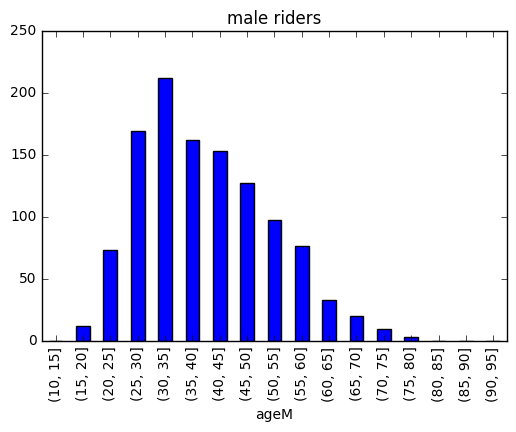

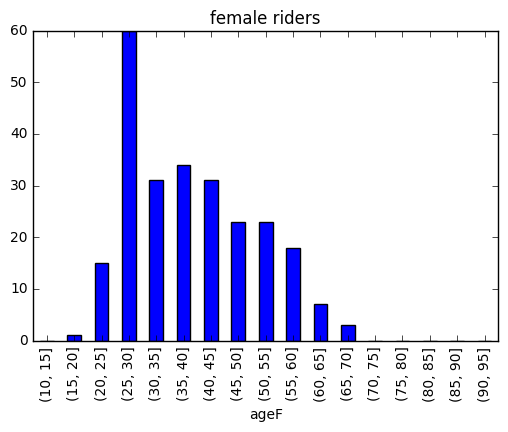

In [32]:
bins = np.arange(10, 99, 5)
axM = subdf.ageM.groupby(pd.cut(subdf.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = subdf.ageF.groupby(pd.cut(subdf.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

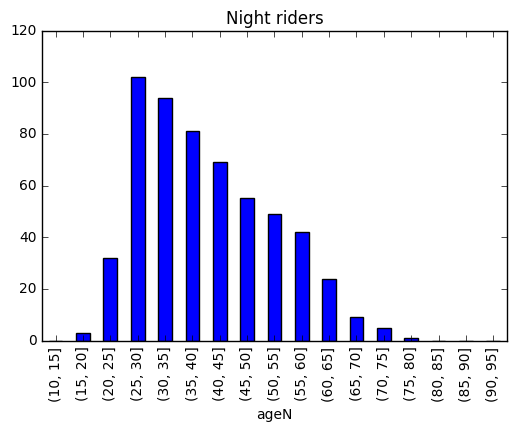

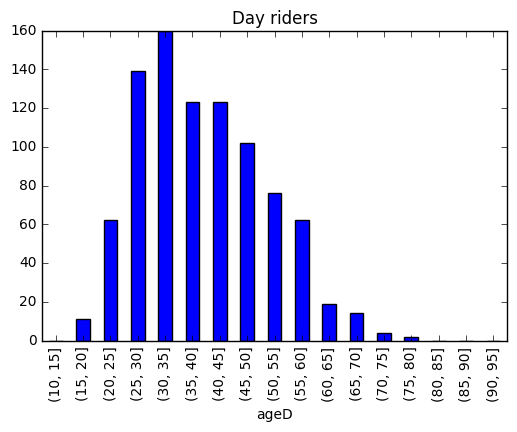

In [33]:
bins = np.arange(10, 99, 5)
axN = subdf.ageN.groupby(pd.cut(subdf.ageN, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_title("Night riders")
axD = subdf.ageD.groupby(pd.cut(subdf.ageD, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axD.set_title("Day riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.006406
(20, 25]       0.009130
(25, 30]       0.087303
(30, 35]       0.028328
(35, 40]       0.025178
(40, 45]       0.017686
(45, 50]       0.000362
(50, 55]       0.009216
(55, 60]       0.016069
(60, 65]       0.015728
(65, 70]       0.010471
(70, 75]       0.002618
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


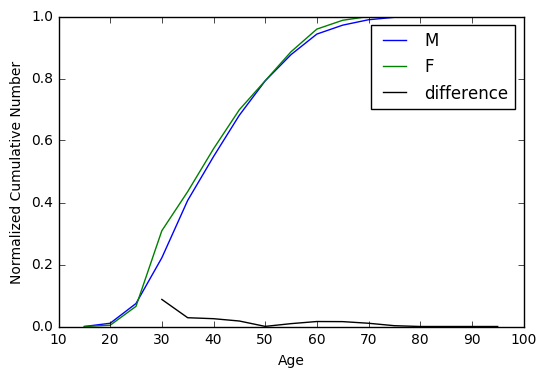

In [34]:
csM=subdf.ageM.groupby(pd.cut(subdf.ageM, bins)).agg([count_nonzero]).cumsum()

csF=subdf.ageF.groupby(pd.cut(subdf.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

          count_nonzero
ageN                   
(10, 15]       0.000000
(15, 20]       0.006963
(20, 25]       0.019545
(25, 30]       0.005706
(30, 35]       0.006589
(35, 40]       0.000603
(40, 45]       0.015818
(45, 50]       0.032358
(50, 55]       0.030512
(55, 60]       0.025426
(60, 65]       0.004205
(65, 70]       0.003912
(70, 75]       0.000463
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


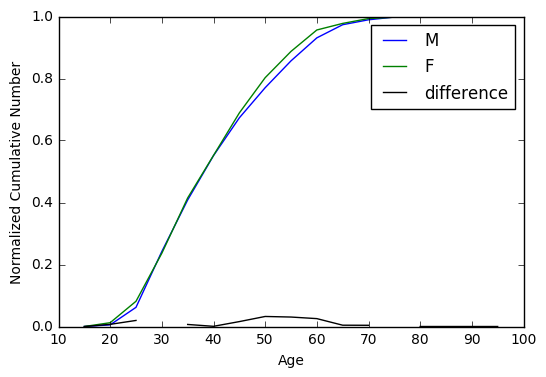

In [35]:
csN= subdf.ageN.groupby(pd.cut(subdf.ageN, bins)).agg([count_nonzero]).cumsum()

csD=subdf.ageD.groupby(pd.cut(subdf.ageD, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csN / csN.max()-csD / csD.max()))

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "M")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [36]:
subdf['ageM'].dropna(inplace= True)
subdf['ageF'].dropna(inplace= True)
subdf['ageD'].dropna(inplace= True)
subdf['ageN'].dropna(inplace= True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [37]:
#for Sub sample
ks = scipy.stats.ks_2samp(subdf.ageM, subdf.ageF)
print (ks)

Ks_2sampResult(statistic=0.10841998568198413, pvalue=0.015689150327056155)


In [38]:
#extra credit (day and night for sub sample)
ks = scipy.stats.ks_2samp(subdf.ageN, subdf.ageD)
print (ks)

Ks_2sampResult(statistic=0.03624859326182264, pvalue=0.74426363828912301)


##Analysis


This time that we are exploring in smaller sample again for male and female we can reject the null hypo. but for day and night pvalue is quite high(greater than our significant level: 0.05) and we can not do that, so for day and night  we dont reject the null hypo that samples came from the same distribution and claim the two distributions are different.


In [39]:
array1= df['ageM'].dropna().values

In [40]:
array1
forsubarray1=array1


In [41]:
array2 = df['ageF'].dropna().values

In [42]:
forsubarray2 =array2
#sprmnarray2 = array2


In [43]:
len(array1)

227764

In [44]:
len(array2)

52093

In [45]:
prsM = np.random.choice( array1, 52093, replace= False )
#sprmnforarray1 = prsM
prsMsub= prsM

In [46]:
len(prsM)

52093

In [47]:
prsM= sorted(prsM, key=int)



In [48]:
array2=  sorted(array2, key=int)


In [49]:
import scipy.stats

In [50]:
#pearson
prsn = scipy.stats.pearsonr(array2, prsM)
print(prsn)

(0.99630246983704207, 0.0)


In [51]:
subarray1= prsMsub[::200]

In [52]:
subarray1
subsamplesprmn= subarray1
subsamplesprmn

array([ 50.,  33.,  36.,  47.,  35.,  43.,  54.,  47.,  44.,  38.,  42.,
        37.,  52.,  61.,  50.,  39.,  33.,  56.,  30.,  47.,  28.,  64.,
        45.,  46.,  41.,  34.,  34.,  42.,  35.,  75.,  32.,  38.,  31.,
        52.,  28.,  63.,  40.,  59.,  24.,  32.,  34.,  30.,  34.,  46.,
        38.,  31.,  51.,  50.,  49.,  30.,  42.,  25.,  62.,  57.,  30.,
        53.,  35.,  52.,  30.,  63.,  41.,  28.,  34.,  52.,  44.,  55.,
        30.,  46.,  40.,  29.,  35.,  52.,  39.,  57.,  46.,  34.,  46.,
        30.,  34.,  60.,  31.,  31.,  64.,  40.,  48.,  51.,  23.,  60.,
        62.,  28.,  43.,  31.,  40.,  27.,  37.,  34.,  30.,  43.,  25.,
        30.,  55.,  52.,  52.,  28.,  37.,  53.,  37.,  32.,  35.,  26.,
        44.,  45.,  57.,  57.,  31.,  34.,  48.,  27.,  53.,  48.,  31.,
        28.,  54.,  18.,  34.,  51.,  41.,  34.,  52.,  43.,  30.,  53.,
        33.,  47.,  30.,  31.,  41.,  30.,  43.,  56.,  29.,  26.,  35.,
        52.,  54.,  32.,  29.,  31.,  53.,  44.,  3

In [53]:
subarray2= forsubarray2[::200]
subsamplesprmn2= subarray2

In [54]:
subarray1 = sorted(subarray1, key=int)
subarray2 = sorted(subarray2, key=int)

In [58]:
prsnsub = scipy.stats.pearsonr(subarray2, subarray1)
print(prsnsub)

(0.99527799098971781, 2.2221567823301574e-264)


##Analysis


 we can reject the null hypothesis that the two samples ( age of man and women) are drawn from uncorrelated populations, since the pvalue is too low. Less than our significant level: 0.05

Spearman Analysis

In [56]:
sprmn= scipy.stats.spearmanr(array2, prsM)
print(sprmn)

SpearmanrResult(correlation=0.99910565394246253, pvalue=0.0)


sub sample for Spearman

In [57]:
sprmnsub= scipy.stats.spearmanr(subarray2, subarray1)
print(sprmnsub)



SpearmanrResult(correlation=0.99865602212676874, pvalue=0.0)


##Analysis
 
 
 we can reject the null hypothesis that the two samples ( age of man and women) are drawn from uncorrelated populations, since the pvalue is too low. Less than our significant level: 0.05